imported
imported
Empty DataFrame
Columns: [StationId, StationName, Change in number of bikes, longitude, latitude]
Index: []
imported


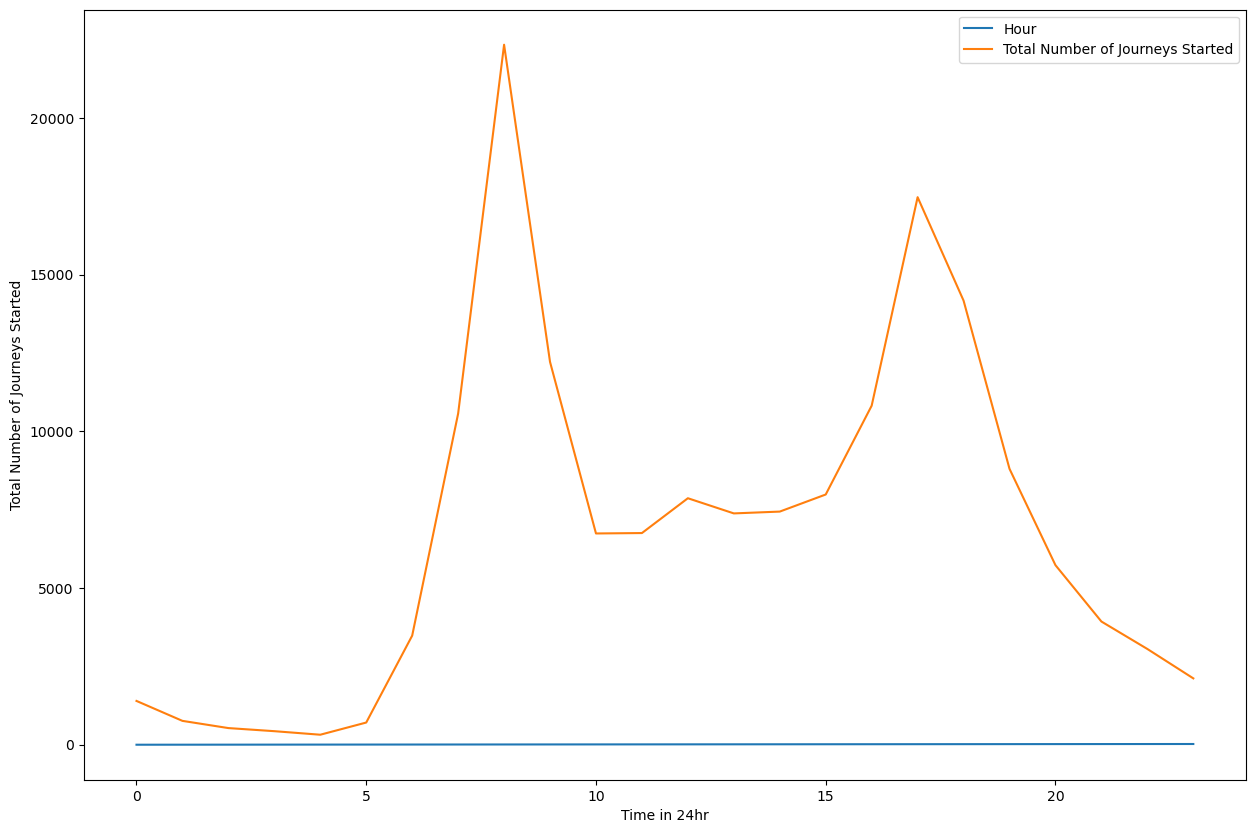

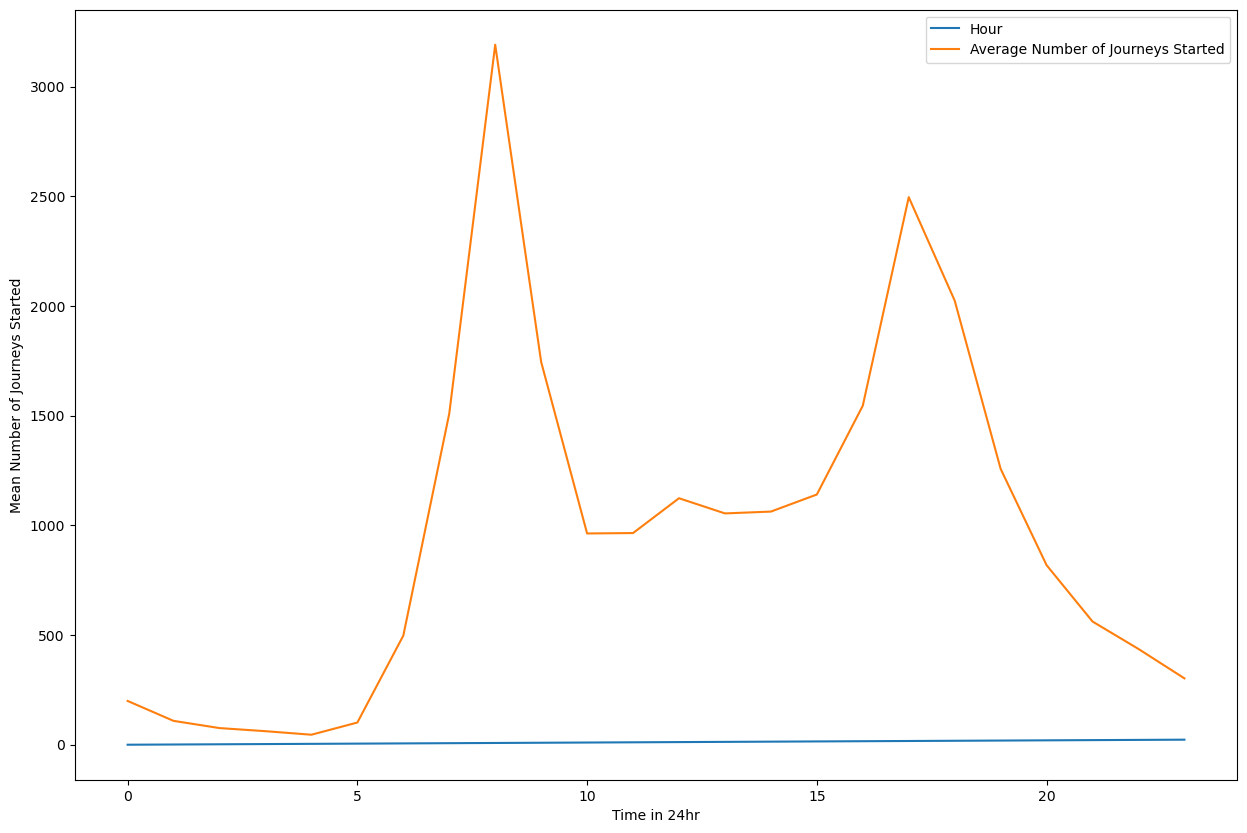

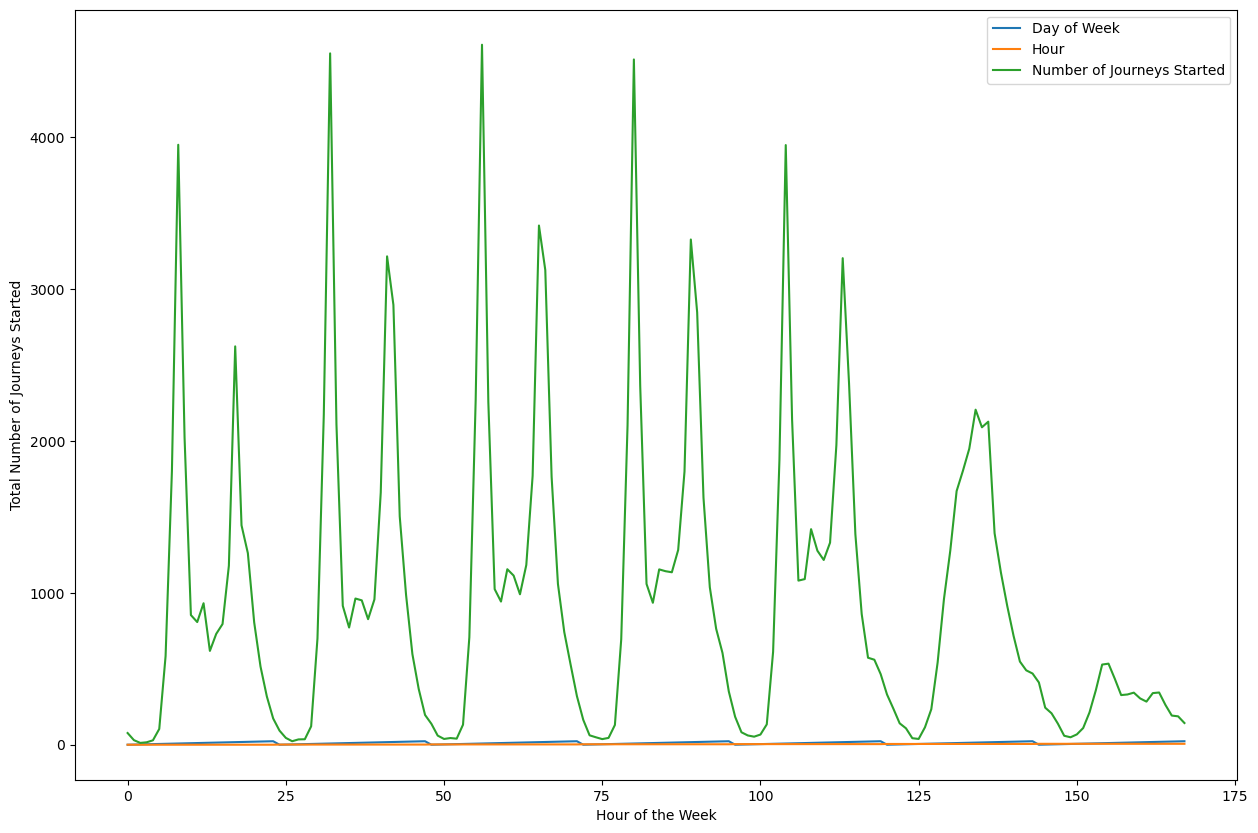

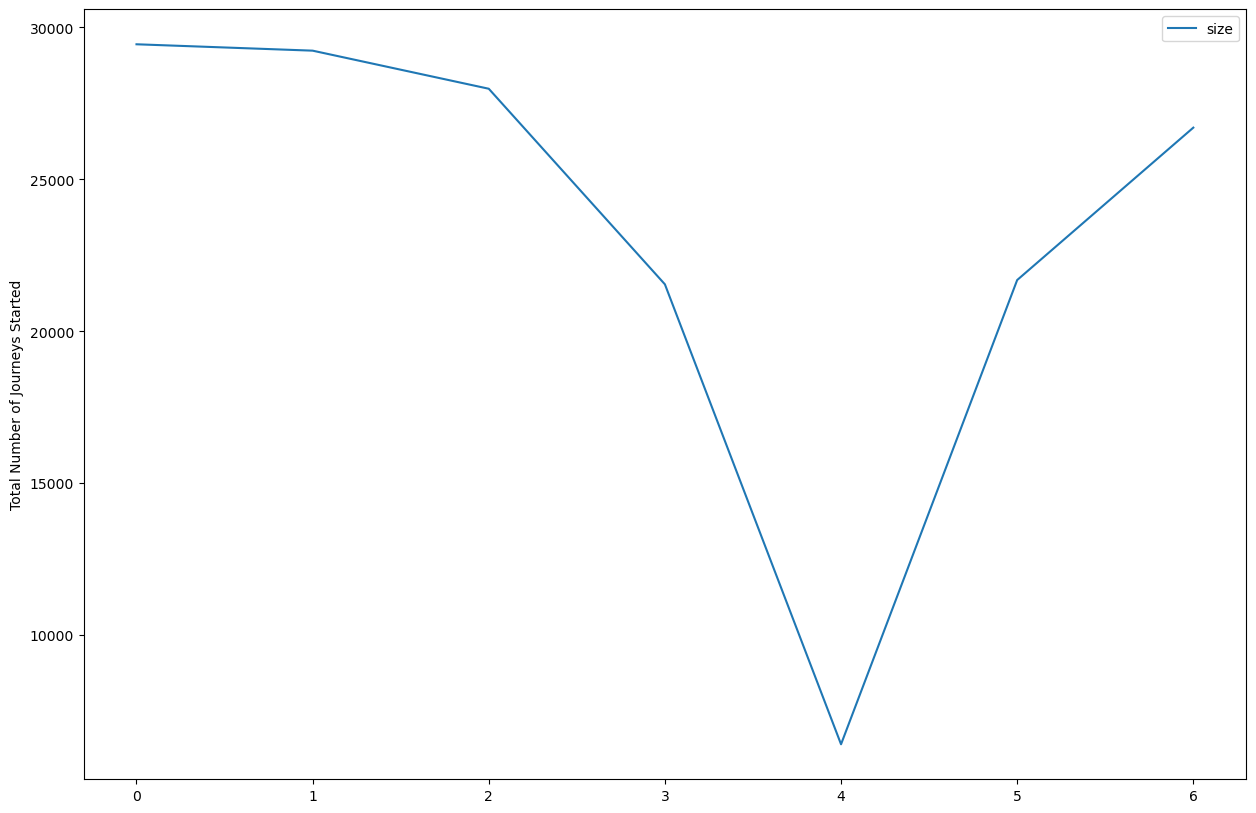

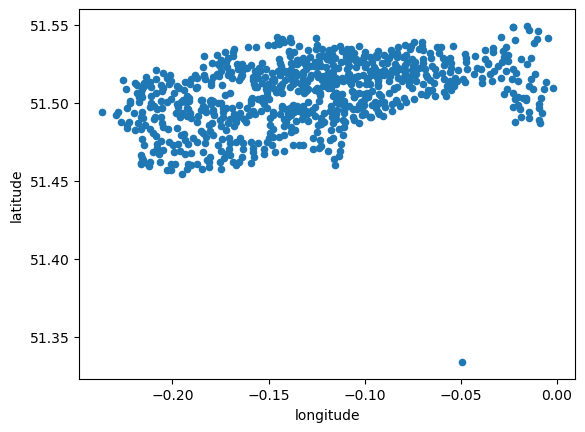

In [1]:
# hypothesis - geographical bubbles of bike stations should exist where total overflow and underflow at the end of the day
#              should balance out to 0 between the cluster of stations

from ipynb.fs.full.Mapping import inventoryAndCoordsDF

print("imported")

# Clustering

In [2]:
inventoryAndCoordsDF

,StationId,StationName,Change in number of bikes,longitude,latitude
0,1,"River Street , Clerkenwell",-6.428571,-0.109971,51.529200
1,2,"Phillimore Gardens, Kensington",-5.571429,-0.197574,51.499600
2,3,"Christopher Street, Liverpool Street",1.714286,-0.084606,51.521300
3,4,"St. Chad's Street, King's Cross",9.714286,-0.120974,51.530100
4,5,"Sedding Street, Sloane Square",-8.857143,-0.156876,51.493100
...,...,...,...,...,...
776,834,"Gas Holders, Battersea Park",5.000000,-0.147857,51.477966
777,835,"Farringdon Street, Holborn",4.285714,-0.104948,51.516785
778,836,"York Way, Kings Cross",27.142857,-0.125442,51.541596
779,838,"Fore Street Avenue, Guildhall",8.428571,-0.091402,51.518093


In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

import numpy as np

print("done")

done


In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
kClustersDF = inventoryAndCoordsDF[["StationName","longitude", "latitude"]]
kClustersDF["inventory"] = inventoryAndCoordsDF["Change in number of bikes"]

C:\Users\marya\AppData\Local\Temp\ipykernel_10272\1088270494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kClustersDF["inventory"] = inventoryAndCoordsDF["Change in number of bikes"]


In [6]:
y_predicted = km.fit_predict(kClustersDF[["longitude","latitude"]])


In [7]:
kClustersDF["cluster_1"] = y_predicted
kClustersDF.head()

,StationName,longitude,latitude,inventory,cluster_1
0,"River Street , Clerkenwell",-0.109971,51.5292,-6.428571,2
1,"Phillimore Gardens, Kensington",-0.197574,51.4996,-5.571429,0
2,"Christopher Street, Liverpool Street",-0.084606,51.5213,1.714286,1
3,"St. Chad's Street, King's Cross",-0.120974,51.5301,9.714286,2
4,"Sedding Street, Sloane Square",-0.156876,51.4931,-8.857143,0


In [8]:
#plt.scatter(kClustersDF)

In [9]:
kClustersDF

,StationName,longitude,latitude,inventory,cluster_1
0,"River Street , Clerkenwell",-0.109971,51.529200,-6.428571,2
1,"Phillimore Gardens, Kensington",-0.197574,51.499600,-5.571429,0
2,"Christopher Street, Liverpool Street",-0.084606,51.521300,1.714286,1
3,"St. Chad's Street, King's Cross",-0.120974,51.530100,9.714286,2
4,"Sedding Street, Sloane Square",-0.156876,51.493100,-8.857143,0
...,...,...,...,...,...
776,"Gas Holders, Battersea Park",-0.147857,51.477966,5.000000,2
777,"Farringdon Street, Holborn",-0.104948,51.516785,4.285714,2
778,"York Way, Kings Cross",-0.125442,51.541596,27.142857,2
779,"Fore Street Avenue, Guildhall",-0.091402,51.518093,8.428571,2


In [10]:
"""
scaler = MinMaxScaler()
scaler.fit(kClustersDF[["longitude"]])
kClustersDF["longitude"] = scaler.transform(kClustersDF)

scaler.fit(kClustersDF.latitude)
kClustersDF.latitude = scaler.transform
kClustersDF

"""

'\nscaler = MinMaxScaler()\nscaler.fit(kClustersDF[["longitude"]])\nkClustersDF["longitude"] = scaler.transform(kClustersDF)\n\nscaler.fit(kClustersDF.latitude)\nkClustersDF.latitude = scaler.transform\nkClustersDF\n\n'

In [11]:
km = KMeans(n_clusters=10)
y_predicted = km.fit_predict(kClustersDF[["longitude", "latitude"]])


# Elbow Plot

In [12]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(kClustersDF[["longitude", "latitude"]])
    sse.append(km.inertia_)

C:\Users\marya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [13]:
sse  #Sum of Square Error

[2.6818590902669217,
 1.0781846608694032,
 0.6140681543073411,
 0.4701576534363486,
 0.38596298138626445,
 0.32144065302868313,
 0.2729323107724445,
 0.23456192868388806,
 0.2117919143702776]

Text(0.5, 1.0, 'Elbow Plot')

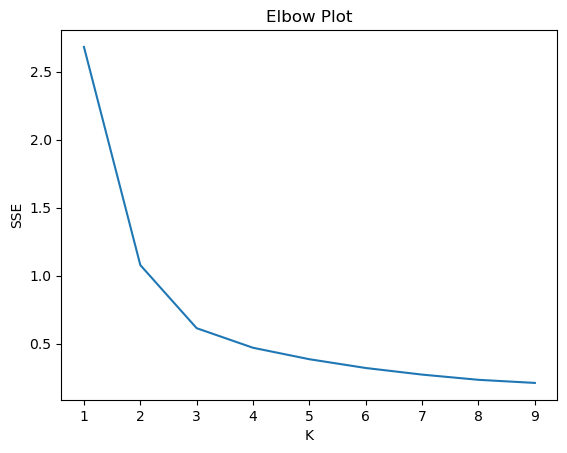

In [14]:
plt.plot(k_rng, sse)
plt.xlabel("K")
plt.ylabel("SSE")
plt.title("Elbow Plot")

# Davies Bouldin Score

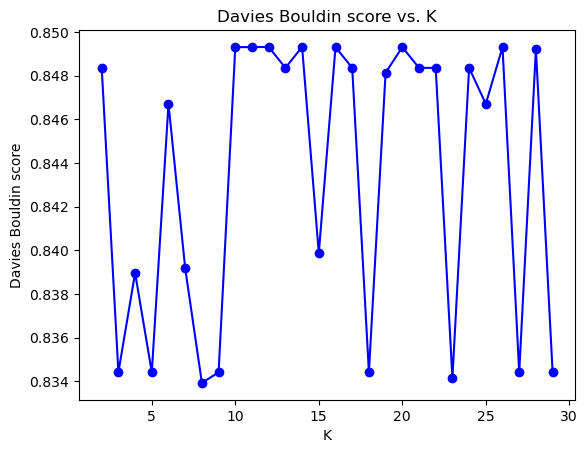

In [15]:
# Code from https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad

# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(data)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(data, model)
    
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(kClustersDF[["longitude", "latitude"]], 4))
    
plt.plot(centers, scores, linestyle='-', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

## Scaler, Fit to our Data then Transform our Data

In [24]:
kClustersDF = kClustersDF.dropna()

scaler = StandardScaler()
kClustersDF[["long_t", "lat_t"]] = scaler.fit_transform(kClustersDF[["longitude", "latitude"]])

In [26]:
invDF = inventoryAndCoordsDF["StationName"]
invDF["inventory"] = inventoryAndCoordsDF["Change in number of bikes"]
invDF["inventory_t"] = scaler.fit_transform(invDF["inventory"])

C:\Users\marya\AppData\Local\Temp\ipykernel_10272\2311246984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invDF["inventory"] = inventoryAndCoordsDF["Change in number of bikes"]


ValueError: Expected 2D array, got 1D array instead:
array=[-6.42857143e+00 -5.57142857e+00  1.71428571e+00  9.71428571e+00
 -8.85714286e+00 -3.00000000e+00  1.14285714e+01 -4.14285714e+00
 -2.57142857e+00  8.00000000e+00 -8.85714286e+00 -3.11428571e+01
 -2.71428571e+00 -9.52857143e+01 -1.14285714e+00 -1.38571429e+01
 -2.00000000e+01  4.85714286e+00 -1.64285714e+01 -1.42857143e+00
  7.42857143e+00 -1.41428571e+01 -7.85714286e+00 -8.57142857e+00
 -2.41428571e+01  1.14285714e+00 -8.28571429e+00  5.71428571e-01
 -1.42857143e+00  7.42857143e+00 -7.71428571e+00 -1.91428571e+01
 -9.00000000e+00  1.07142857e+01 -8.57142857e-01 -5.57142857e+00
 -2.14285714e+00 -3.14285714e+01 -5.71428571e-01 -2.54285714e+01
 -2.00000000e+00 -1.12857143e+01  0.00000000e+00 -1.68571429e+01
 -2.95714286e+01 -2.57142857e+00 -1.42857143e-01  2.38571429e+01
  5.71428571e+00 -2.14285714e+00 -4.00000000e+00  1.73333333e+01
  1.18571429e+01 -1.74285714e+01 -1.44285714e+01 -1.20000000e+01
 -1.37142857e+01  8.57142857e-01  8.57142857e-01  4.14285714e+00
  2.28571429e+00 -1.74285714e+01  1.00000000e+00  1.27142857e+01
 -1.42857143e+01 -1.71428571e+01  6.57142857e+00  5.28571429e+00
 -2.67142857e+01  1.57142857e+00 -4.02857143e+01 -4.28571429e+01
 -4.85714286e+00 -3.14285714e+00 -1.42857143e+00 -2.14285714e+00
  7.00000000e+00  4.94285714e+01  4.85714286e+00  4.40000000e+00
  1.60000000e+00 -2.14285714e+00 -2.28571429e+00  1.42857143e-01
 -8.71428571e+00  2.28571429e+00  7.14285714e+00  3.28571429e+00
 -5.57142857e+00  7.14285714e+00 -1.64285714e+01  1.85714286e+00
 -1.27142857e+01  2.57142857e+00  1.71428571e+00 -1.48571429e+01
 -2.42857143e+00  1.35714286e+01 -4.52857143e+01 -1.85714286e+00
  8.42857143e+00 -2.14285714e+01  8.57142857e-01  3.17142857e+01
 -2.68571429e+01 -8.57142857e+00 -1.24285714e+01  2.30000000e+01
 -6.57142857e+00 -9.71428571e+00  1.42857143e+00 -2.14285714e+00
 -1.05714286e+01 -1.90000000e+01 -8.85714286e+00  6.57142857e+00
  6.28571429e+00  2.71428571e+00 -5.14285714e+00  8.57142857e-01
  2.98571429e+01  4.28571429e+00 -5.85714286e+00 -6.14285714e+00
  8.66666667e+00  6.57142857e+00  8.57142857e-01 -2.28571429e+00
  2.42857143e+00 -2.72857143e+01 -1.68571429e+01  1.25714286e+01
 -1.32857143e+01  2.91428571e+01  1.05714286e+01  2.71428571e+00
  6.14285714e+00 -9.57142857e+00  2.12857143e+01  1.57142857e+00
 -1.10000000e+01  5.33333333e+00  6.00000000e+00 -5.71428571e-01
  1.41428571e+01  1.10000000e+01  1.02857143e+01  4.57142857e+00
 -1.47142857e+01 -1.52142857e+02  5.85714286e+00  7.28571429e+00
  2.84285714e+01  1.10000000e+01 -1.12857143e+01  2.51428571e+01
  2.14285714e+00 -1.50000000e+01  3.42857143e+00  1.71428571e+01
  3.14285714e+00 -1.48571429e+01 -1.42857143e-01 -8.14285714e+00
  2.57142857e+00  3.14285714e+00  1.07142857e+01  2.00000000e+00
 -1.10000000e+01 -6.42857143e+00  2.85714286e-01 -1.21428571e+01
  9.00000000e+00  8.14285714e+00  5.71428571e+00  2.00000000e+00
 -8.71428571e+00  2.71428571e+00 -8.57142857e+00 -4.55714286e+01
  7.57142857e+00  1.15714286e+01 -1.85714286e+00 -1.15714286e+01
 -4.61428571e+01 -7.14285714e+00 -8.28571429e+00 -1.71428571e+00
 -5.57142857e+00 -2.14285714e+00 -2.62857143e+01  1.42857143e-01
 -1.45714286e+01 -6.57142857e+00 -2.48571429e+01 -1.75714286e+01
  4.28571429e-01 -1.32857143e+01  1.85714286e+00  1.30000000e+01
  1.38571429e+01 -1.77142857e+01  3.71428571e+00  3.00000000e+00
  4.27142857e+01 -1.24285714e+01 -8.42857143e+00 -6.58571429e+01
 -5.28571429e+00 -1.02857143e+01  4.14285714e+00 -1.18571429e+01
  3.14285714e+00 -2.85714286e-01 -5.00000000e+00 -1.85714286e+01
  5.71428571e-01 -2.85714286e-01 -1.30000000e+01 -2.34285714e+01
  1.12857143e+01  1.90000000e+01  2.28571429e+00 -2.83333333e+00
 -1.14285714e+00  5.71428571e-01  7.42857143e+00 -2.85714286e-01
 -1.85714286e+00 -1.77142857e+01  6.16666667e+00  4.42857143e+00
 -1.21428571e+01  1.40000000e+01  3.57142857e+00 -3.85714286e+00
  1.21428571e+01 -5.16666667e+00 -4.57142857e+00  6.57142857e+00
 -2.15714286e+01 -1.27142857e+01 -5.42857143e+00 -3.71428571e+00
 -1.42857143e-01  3.00000000e+01  1.15714286e+01  8.57142857e-01
  3.14285714e+00  1.00000000e+00  4.85714286e+00  8.57142857e-01
 -1.44285714e+01 -8.14285714e+00  2.85714286e+00  5.57142857e+00
  6.00000000e+00  6.14285714e+00 -1.42857143e+00 -3.88571429e+01
  7.85714286e+00 -1.47142857e+01  4.90000000e+01  3.71428571e+00
  3.28571429e+00  6.71428571e+00 -1.42857143e-01 -3.80000000e+01
 -1.61428571e+01 -3.71428571e+00 -1.40000000e+01 -2.57142857e+01
  1.03333333e+01 -1.85714286e+00 -2.00000000e+00  1.40000000e+01
 -3.14285714e+00  2.72857143e+01 -1.80000000e+01 -8.28571429e+00
  5.42857143e+00 -3.28571429e+00 -3.28571429e+00 -5.28571429e+00
  9.71428571e+00  5.00000000e+00 -2.02857143e+01  1.42857143e+00
 -5.14285714e+00 -1.45714286e+01 -5.71428571e-01 -1.60000000e+01
 -5.28571429e+00 -2.40000000e+01 -8.85714286e+00 -7.14285714e-01
 -6.14285714e+00 -1.57142857e+00 -4.85714286e+00 -8.57142857e-01
 -1.42857143e-01  1.22857143e+01  6.00000000e+00  6.57142857e+00
 -6.28571429e+00  1.42857143e+00 -1.55714286e+01 -9.28571429e+00
 -1.14285714e+00  1.05714286e+01 -1.00000000e+00 -6.57142857e+00
 -1.27142857e+01  2.40000000e+01  6.85714286e+00  8.57142857e-01
 -2.01428571e+01  6.85714286e+00  3.14285714e+00 -1.42857143e-01
 -1.14285714e+00  1.00000000e+01  7.16666667e+00  7.71428571e+00
 -8.85714286e+00  3.57142857e+00 -1.35714286e+01 -3.17142857e+01
  1.42857143e-01  3.28571429e+00 -2.28571429e+00 -1.14285714e+01
  2.42857143e+00  6.28571429e+00  1.48333333e+01 -1.21428571e+01
 -3.00000000e+00  3.14285714e+00  9.28571429e+00 -1.28571429e+01
 -7.28571429e+00 -1.00000000e+00  1.20000000e+01  7.85714286e+00
 -5.55714286e+01 -9.57142857e+00  1.35714286e+01  4.71428571e+00
 -9.42857143e+00  9.85714286e+00 -2.57142857e+00 -9.85714286e+00
 -4.28571429e-01  2.00000000e+00 -1.32857143e+01 -7.42857143e+00
 -9.20000000e+01  5.85714286e+00 -1.05714286e+01  4.57142857e+00
  6.28571429e+00 -2.42857143e+00  1.27142857e+01 -2.42857143e+00
  1.60000000e+01  1.05714286e+01  4.85714286e+00 -1.47142857e+01
  1.92857143e+01  3.85714286e+00  1.20000000e+01  1.41428571e+01
 -2.71428571e+00 -1.70000000e+01  3.14285714e+00 -1.42857143e+00
  9.42857143e+00 -7.00000000e+00  6.14285714e+00  3.57142857e+00
 -1.35714286e+01  9.00000000e+00 -1.71428571e+00  5.66666667e+00
 -1.58571429e+01  1.43333333e+01  1.37142857e+01 -4.00000000e+00
 -1.05714286e+01  4.14285714e+00  1.00000000e+00  1.31428571e+01
 -1.64285714e+01  3.00000000e+00  5.14285714e+00 -3.28571429e+00
  6.28571429e+00 -2.31428571e+01 -1.47142857e+01  2.01428571e+01
  9.14285714e+00 -4.28571429e+00 -2.15714286e+01 -1.42857143e-01
 -3.78571429e+01 -7.85714286e+00  3.14285714e+00  1.18571429e+01
  1.32857143e+01  1.14285714e+01 -6.28571429e+00 -1.00000000e+00
  1.78571429e+01 -8.00000000e+00  1.07142857e+01  1.54285714e+01
 -7.71428571e+00  4.00000000e+00 -9.14285714e+00  6.28571429e+00
  7.71428571e+00  1.11428571e+01  1.05714286e+01  1.17142857e+01
 -1.05714286e+01 -1.42857143e-01  7.14285714e-01  1.47142857e+01
  1.00000000e+00 -1.50000000e+01  7.85714286e+00  1.27142857e+01
  1.85714286e+00  3.14285714e+00  1.14285714e+01  5.00000000e+00
  1.97142857e+01  4.71428571e+00 -1.14285714e+00  2.01666667e+01
  1.58333333e+01  2.70000000e+01  2.30000000e+01  7.71428571e+00
 -1.51428571e+01 -3.28571429e+00  2.71428571e+00  4.14285714e+00
 -1.42857143e+00  1.11428571e+01  3.42857143e+00 -9.14285714e+00
  5.71428571e-01 -1.34285714e+01  1.42857143e-01 -2.05714286e+01
 -1.11428571e+01  1.00000000e+01  3.57142857e+00  4.28571429e+00
  6.71428571e+00  7.57142857e+00 -2.57142857e+00  9.28571429e+00
  7.57142857e+00  8.57142857e+00 -1.98571429e+01  2.32000000e+01
 -2.42857143e+00  6.85714286e+00 -3.85714286e+00 -1.22857143e+01
  1.45714286e+01 -1.17142857e+01 -5.14285714e+00 -3.32857143e+01
  3.67142857e+01 -1.28571429e+00  1.45714286e+01  3.28571429e+00
 -1.71428571e+00 -2.00000000e+00  1.54000000e+01 -2.00000000e+00
  4.28571429e-01 -3.00000000e+00  7.14285714e+00 -1.24285714e+01
  1.35714286e+01  8.14285714e+00  2.00000000e+00 -1.28571429e+00
  7.42857143e+00  1.17142857e+01  1.98571429e+01  3.87142857e+01
 -3.71428571e+00 -1.00000000e+00  1.08571429e+01 -4.85714286e+00
  1.25714286e+01 -2.42857143e+00 -1.75714286e+01  3.57142857e+00
  6.71428571e+00 -1.00000000e+00  5.85714286e+00 -1.32857143e+01
  1.22857143e+01  6.42857143e+00 -3.71428571e+00  4.14285714e+00
  1.10000000e+01  3.38571429e+01 -1.32857143e+01  1.14285714e+01
  3.57142857e+00 -3.00000000e+00 -2.38571429e+01  3.28571429e+00
  1.04285714e+01  9.85714286e+00  2.85714286e-01  1.40000000e+01
  2.28571429e+00  2.71428571e+01  9.42857143e+00 -1.28571429e+00
  3.28571429e+00 -5.42857143e+00  1.91428571e+01  8.57142857e-01
 -1.92857143e+01 -1.42857143e+00  9.42857143e+00 -6.28571429e+00
  5.35714286e+01 -6.85714286e+00 -5.00000000e+00 -1.31428571e+01
  0.00000000e+00  5.57142857e+00  1.10000000e+01 -1.52857143e+01
  5.00000000e+00 -3.14285714e+00  1.41428571e+01  2.18571429e+01
  7.42857143e+00 -4.57142857e+00 -2.57142857e+00 -8.85714286e+00
 -3.71428571e+00  3.71428571e+00  9.57142857e+00  8.14285714e+00
  1.28571429e+00 -1.04285714e+01  4.14285714e+00  1.14285714e+00
  6.57142857e+00  5.71428571e-01  9.71428571e+00  1.08571429e+01
  1.77142857e+01  1.64285714e+01  8.71428571e+00 -4.71428571e+00
 -1.27142857e+01  1.38571429e+01 -4.28571429e+00 -4.00000000e+00
  1.35714286e+01  5.57142857e+00  6.14285714e+00  5.14285714e+00
  0.00000000e+00 -5.71428571e-01  6.14285714e+00  6.14285714e+00
  1.97142857e+01  1.11428571e+01  6.42857143e+00 -2.57142857e+00
  2.37142857e+01  1.85714286e+00  7.71428571e+00  9.71428571e+00
  1.00000000e+00  5.85714286e+00 -5.42857143e+00 -2.85714286e-01
  6.00000000e+00 -1.57142857e+01 -5.71428571e+00 -1.00000000e+00
  4.00000000e+00  5.71428571e+00  1.71428571e+01  0.00000000e+00
  8.28571429e+00  2.57142857e+00  9.71428571e+00  2.00000000e+00
  1.54285714e+01  3.42857143e+00 -2.85714286e-01  2.30000000e+01
  1.42857143e+00 -1.42857143e+00  6.00000000e+00  1.04285714e+01
  7.57142857e+00 -4.00000000e+00  7.14285714e-01  5.85714286e+00
  5.71428571e-01 -2.71428571e+00 -3.85714286e+00  1.28571429e+00
  1.25714286e+01  1.34285714e+01  8.00000000e+00 -4.57142857e+00
  3.02857143e+01 -1.57142857e+00 -2.57142857e+01  3.00000000e+00
 -6.00000000e+00  1.70000000e+01 -3.42857143e+00  5.14285714e+00
  1.35714286e+01  4.00000000e+00 -7.71428571e+00  1.75714286e+01
  4.71428571e+00  9.57142857e+00  1.10000000e+01 -4.00000000e+00
  1.84285714e+01  5.71428571e-01  1.48571429e+01  1.41428571e+01
  9.85714286e+00 -6.57142857e+00 -2.42857143e+00  1.08571429e+01
  4.16666667e+00 -3.48571429e+01  2.14285714e+00 -1.57142857e+00
 -6.57142857e+00  1.17142857e+01  2.18571429e+01  0.00000000e+00
  7.28571429e+00 -2.20000000e+01  1.45714286e+01  1.50000000e+01
 -7.57142857e+00 -4.28571429e+00  8.00000000e+00  1.75714286e+01
 -2.71428571e+00 -2.14285714e+00 -3.00000000e+00  4.33333333e+00
  1.78571429e+01  1.00000000e+01  1.88571429e+01 -2.28571429e+01
 -2.00000000e+00 -5.71428571e+00 -1.85714286e+00  1.85714286e+00
 -2.42857143e+00 -1.31428571e+01  9.42857143e+00 -8.28571429e+00
  2.71428571e+00 -5.57142857e+00  8.00000000e+00 -1.72857143e+01
  4.28571429e+00 -2.14285714e+00 -1.91428571e+01  8.42857143e+00
  7.28571429e+00 -2.14285714e+00  1.31428571e+01 -2.07142857e+01
  3.00000000e+00 -2.14285714e+00  1.32857143e+01  1.85714286e+01
  2.00000000e+00  1.34285714e+01  1.78571429e+01  1.17142857e+01
 -2.57142857e+00  6.42857143e+00 -1.35714286e+01 -7.57142857e+00
  1.10000000e+01  1.41428571e+01  1.88571429e+01 -2.71428571e+00
  4.28571429e-01 -6.28571429e+00  2.00000000e+00  8.57142857e+00
  1.62857143e+01  3.91428571e+01 -3.21428571e+01 -4.00000000e+00
  1.71428571e+00  1.14285714e+01  1.42857143e-01  1.18333333e+01
 -3.57142857e+00 -7.14285714e-01  4.28571429e+00  1.62857143e+01
 -1.11428571e+01 -2.67142857e+01  1.60000000e+01  1.68571429e+01
  1.57142857e+00  5.57142857e+00 -1.85714286e+00 -1.02857143e+01
  1.50000000e+01 -5.85714286e+00 -1.34285714e+01 -3.14285714e+00
 -2.97142857e+01  7.42857143e+00  1.45714286e+01  1.35000000e+01
  4.28571429e+00 -2.42857143e+00  2.10000000e+01 -1.85714286e+00
 -2.42857143e+00 -1.50000000e+01 -2.00000000e+00 -6.14285714e+00
  2.85714286e+01 -7.71428571e+00 -3.00000000e+00  5.28571429e+00
 -6.28571429e+00 -6.28571429e+00  1.72857143e+01  4.42857143e+00
 -6.71428571e+00  3.00000000e+00  1.88571429e+01  2.85714286e-01
  5.57142857e+00 -2.68571429e+01  9.42857143e+00 -1.50000000e+01
 -8.71428571e+00  4.34285714e+01 -2.00000000e+00 -7.42857143e+00
 -1.35714286e+01  2.71428571e+00 -2.57142857e+00  2.97142857e+01
  9.28571429e+00 -5.71428571e-01 -3.42857143e+00  8.14285714e+00
  5.00000000e+00  4.28571429e+00  2.71428571e+01  8.42857143e+00
 -2.72857143e+01].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

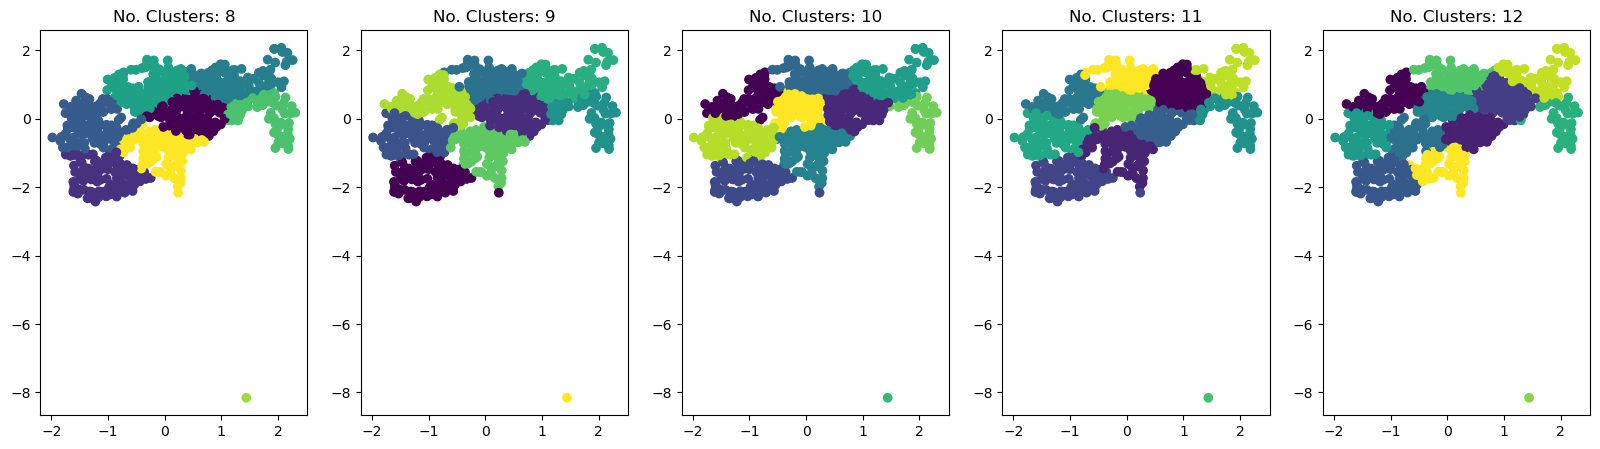

In [23]:
def K_Clustering(data, k):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[["long_t", "lat_t"]])
    data["kmeans_"+str(k)] = kmeans.labels_
    
    return data

def plotColouredScatter(df, xCol, yCol, clusterCol):
    plt.scatter(x=df[xCol], y=df[yCol], c=df[clusterCol])


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
#k = 10

for k, ax in enumerate(fig.axes, start=8):
    clusteredDF = K_Clustering(kClustersDF, k)
    ax.scatter(x=clusteredDF["long_t"], y=clusteredDF["lat_t"], c=clusteredDF[f"kmeans_{k}"])
    #plotColouredScatter(clusteredDF, "long_t", "lat_t", f"kmeans_{k}")
    ax.set_title(f"No. Clusters: {k}")
    

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(kClustersDF[["long_t", "lat_t"]])

KMeans(n_clusters=3)

In [19]:
kClustersDF["kmeans_3"] = kmeans.labels_

In [20]:
kClustersDF

,StationName,longitude,latitude,inventory,cluster_1,long_t,lat_t,kmeans_3,kmeans_4,kmeans_5,kmeans_6,kmeans_7
0,"River Street , Clerkenwell",-0.109971,51.529200,-6.428571,2,0.336023,1.111009,2,2,4,4,4
1,"Phillimore Gardens, Kensington",-0.197574,51.499600,-5.571429,0,-1.265917,-0.294748,0,3,0,5,1
2,"Christopher Street, Liverpool Street",-0.084606,51.521300,1.714286,1,0.799862,0.735824,1,1,1,4,0
3,"St. Chad's Street, King's Cross",-0.120974,51.530100,9.714286,2,0.134818,1.153752,2,2,4,4,4
4,"Sedding Street, Sloane Square",-0.156876,51.493100,-8.857143,0,-0.521699,-0.603445,0,3,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
776,"Gas Holders, Battersea Park",-0.147857,51.477966,5.000000,2,-0.356774,-1.322186,0,0,2,2,3
777,"Farringdon Street, Holborn",-0.104948,51.516785,4.285714,2,0.427879,0.521398,2,2,4,4,4
778,"York Way, Kings Cross",-0.125442,51.541596,27.142857,2,0.053115,1.699718,2,2,4,4,4
779,"Fore Street Avenue, Guildhall",-0.091402,51.518093,8.428571,2,0.675588,0.583518,1,2,1,4,0


## Plotting the Results

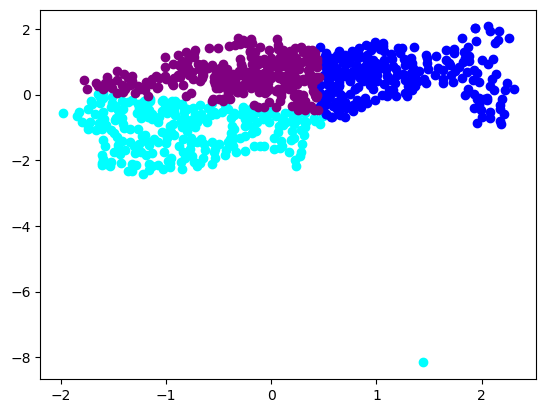

In [21]:
df0 = kClustersDF[kClustersDF.kmeans_3==0]
df1 = kClustersDF[kClustersDF.kmeans_3==1]
df2 = kClustersDF[kClustersDF.kmeans_3==2]
plt.scatter(df0.long_t, df0.lat_t, color="cyan")
plt.scatter(df1.long_t, df1.lat_t, color="blue")
plt.scatter(df2.long_t, df2.lat_t, color="purple")

In [22]:
u_labels = np